In [49]:

pyber_starter Data Analysis:
1.pyber_starter is a ride sharing startup company.pyber_starter has total of 2973 drivers in the Suburban,urban, and Rural.
2.the highest percentage of the total fares,total rides, and total drivers are in the Suburban.
3.the lowest percentage of the total fares,total rides, and total drivers are in the urban.


%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "city_data.csv"
ride_data_to_load = "ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv("data/city_data.csv")
ride_df = pd.read_csv("data/ride_data.csv")

# Combine the data into a single dataset
combined_data_df = pd.merge(ride_df,city_df, 
                                 how='left',on='city')

# Display the data table for preview
combined_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


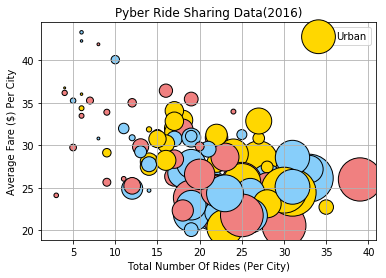

In [45]:
Gdata_df = combined_data_df.groupby(["city"])
Gcity_df = city_df.groupby(["city"])
Gcity_df1 = Gdata_df.nunique()
Totalride = Gdata_df["ride_id"].count()
TotalDrivers = Gdata_df["driver_count"].sum()
ctype = ['Urban','Rural','Suburban']
Averagefare = Gdata_df["fare"].mean()
Summary_df = pd.DataFrame(
    {"Average Fare": Averagefare,
    "Total Ride":Totalride,
    "Total Drivers":TotalDrivers
    }   
)

colors =['gold','lightskyblue','lightcoral']

x = []
y = []
z = []
y = Summary_df[['Average Fare']]
x = Summary_df[['Total Ride']]
z = Summary_df[['Total Drivers']]
plt.scatter(x, y,z,c=colors,marker="o",alpha=0.75, edgecolors="black")
plt.title("Pyber Ride Sharing Data(2016)")
plt.xlabel('Total Number Of Rides (Per City)')
plt.ylabel('Average Fare ($) Per City')
plt.legend(['Urban','Rural','Suburban'], loc="best")
plt.grid()
plt.show()

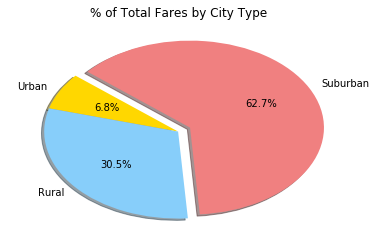

<Figure size 432x288 with 0 Axes>

In [44]:
Tdata_df = combined_data_df.groupby(["type"])
tfare = ride_df["fare"].sum()
Totalfaret = Tdata_df["fare"].sum()
Percent = (Totalfaret/tfare )*100
perc_df = pd.DataFrame(
    {"Percent": Percent
    }   
)

sizes =[]
sizes = perc_df[['Percent']]

explode = (0, 0, 0.1)
 
plt.pie(sizes, explode=explode, labels=ctype, colors=colors,autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Fares by City Type") 
plt.show()
plt.savefig("TotalFares.png")

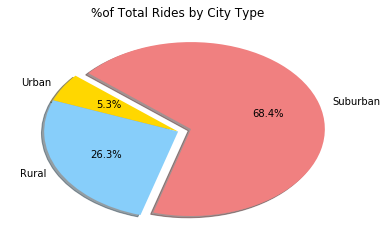

<Figure size 432x288 with 0 Axes>

In [29]:
#Rdata_df = combined_data_df.groupby(["type"])
Totalride = Tdata_df["ride_id"].count()
tride = ride_df["ride_id"].count()
#TotalDrivers = Gdata_df["driver_count"].sum()
Rpercent = (Totalride/tride )*100
Rperc_df = pd.DataFrame(
    {"Percent": Rpercent
    }   
)
Rperc_df
sizes =[]
sizes = Rperc_df[['Percent']]
explode = (0, 0, 0.1)
plt.pie(sizes, explode=explode, labels=ctype, colors=colors,autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("%of Total Rides by City Type") 
plt.show()
plt.savefig("TotalRides.png")

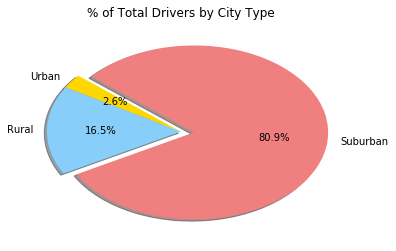

<Figure size 432x288 with 0 Axes>

In [30]:
Tdata_df1 = city_df.groupby(["type"])
TotalDrivers = Tdata_df1["driver_count"].sum()
ddata = city_df["driver_count"].sum()
Dpercent = (TotalDrivers/ddata)*100
Dpercent
Dperc_df = pd.DataFrame(
    {"Percent": Dpercent
    }   
)
Dperc_df
sizes =[]
sizes = Dperc_df[['Percent']]
explode = (0, 0, 0.1)
plt.pie(sizes, explode=explode, labels=ctype, colors=colors,autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Drivers by City Type") 
plt.show()
plt.savefig("TotalDrivers.png")